# Datos

In [20]:
#paquetes locales diseñados para nuestro caso de estudio
from localpacks.data import get_data 

#utilidades para los mapas
import os
import folium
import contextily as ctx #la usamos para agregar un mapa de fondo

#graicos
import matplotlib as plt

### Inpeccionamos nuestros datos

In [2]:
shapefile = get_data()

In [23]:
shapefile.head(3)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,POLYGON ((-7131581.807809997 -3513030.84912475...
1,336421,141470304,211.0,223.0,434.0,125.0,318.0,121.0,POLYGON ((-7168612.331769154 -3724141.90212404...
2,336420,141470302,203.0,168.0,371.0,105.0,117.0,44.0,POLYGON ((-7175242.721334218 -3713314.07232554...


Podemos observar que los datos corresponden a los de la descripción del **README.md**

In [24]:
shapefile.describe()

,toponimo_i,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,312346.756734,337.771044,358.541246,696.312290,217.138678,259.303662,205.924453
std,12036.316427,196.816007,205.086649,398.267489,113.233837,126.846555,106.444272
min,286803.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,315082.750000,198.000000,218.000000,419.750000,145.000000,194.000000,138.000000
50%,316309.500000,334.000000,369.000000,703.000000,229.500000,269.000000,218.000000
75%,317835.250000,455.250000,489.000000,944.000000,293.000000,339.000000,277.000000
max,336422.000000,2483.000000,1622.000000,3273.000000,850.000000,1172.000000,707.000000


In [25]:
shapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 9 columns):
toponimo_i    4752 non-null int64
link          4752 non-null object
varon         4752 non-null float64
mujer         4752 non-null float64
totalpobl     4752 non-null float64
hogares       4752 non-null float64
viviendasp    4752 non-null float64
viv_part_h    4752 non-null float64
geometry      4752 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 334.2+ KB


## Visualización de Datos

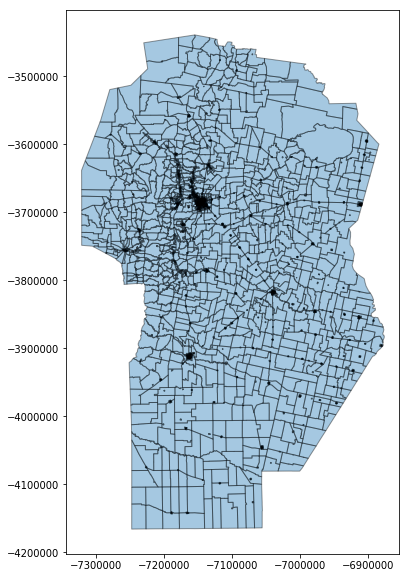

In [28]:
shapefile.plot(figsize=(10, 10), alpha=0.4, edgecolor='k');

#### Agregamos un mapa de fondo

In [31]:
shapefile = shapefile.to_crs(epsg=3857)
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

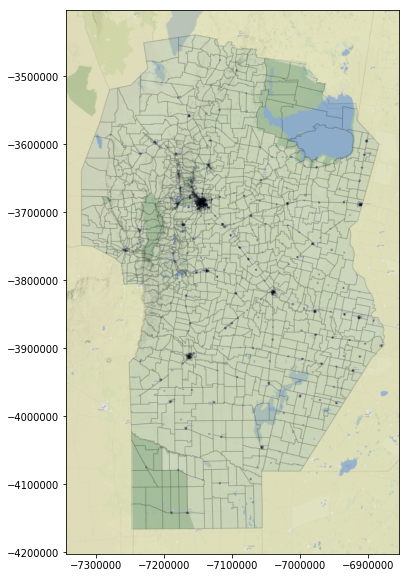

In [33]:
ax = shapefile.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
add_basemap(ax, zoom=10)